# Name- Atharva Ingale

## TSF GRIP Data Science & Business Analytics

## Task-2:- Prediction using Unsuperviced ML

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
#Checking for null values in data
iris_df.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [6]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

## K Means Clustering

In [7]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
OMP_NUM_THREADS=1

C:\Users\aking\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


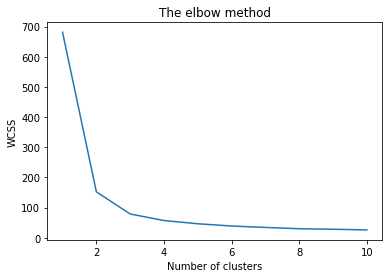

In [8]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

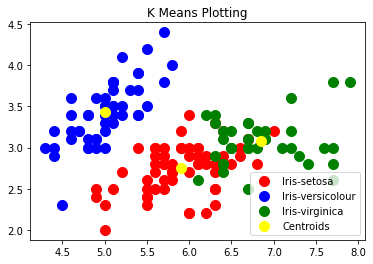

In [10]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title("K Means Plotting")

plt.legend()

## Hierarchical Clustering

In [11]:
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

In [12]:
#scale the data and normalize
sc=StandardScaler()
iris_df_scaled = sc.fit_transform(iris_df)
iris_df_normalize = normalize(iris_df_scaled)

In [13]:
#reduce the dimensionality of data to 3 fetures
pca = PCA(n_components=3)
iris_df_pca = pca.fit_transform(iris_df_normalize)
iris_df_pca = pd.DataFrame(iris_df_pca)
iris_df_pca.columns = ['C1' , 'C2' , 'C3']

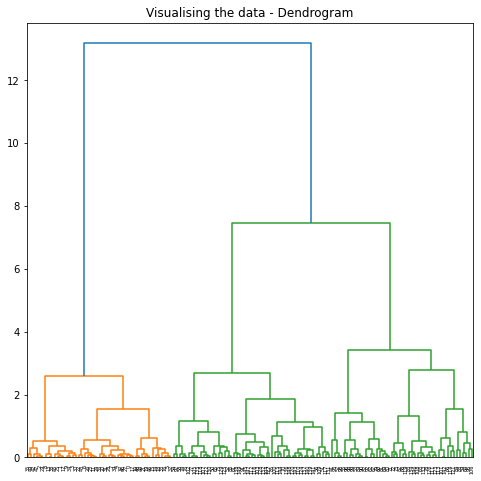

In [14]:
#create the dendogram plot
plt.figure(figsize = (8,8))
plt.title('Visualising the data - Dendrogram')
dendrogram = hc.dendrogram((hc.linkage(iris_df_pca, method='ward')))

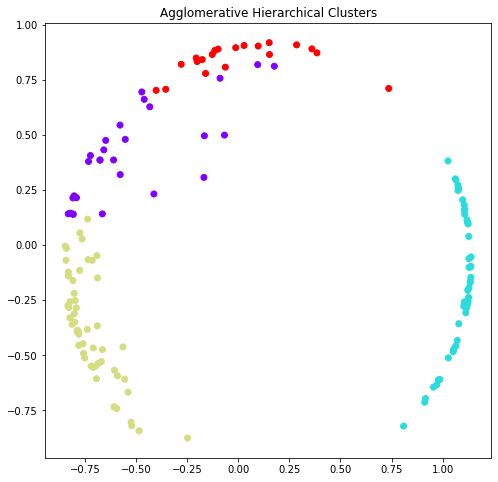

In [15]:
#create the clusters using Agglomerative hierarchical clustering
agc = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize = (8,8))
plt.scatter(iris_df_pca['C1'] , iris_df_pca['C2'] , c= agc.fit_predict(iris_df_pca) , cmap='rainbow')
plt.title("Agglomerative Hierarchical Clusters")
plt.show()